In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
plt.rc('font',family='NanumGothic ECO')
plt.rc('axes',unicode_minus=False)

In [11]:
data= pd.read_csv("/home/piai/다운로드/Preprocessed_Car.csv", encoding='euc-kr')
data.head(10)

,Unnamed: 0,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,BRAND,MODEL,Kilometer_Range_Grade
0,1221,AMBASSADOR CLASSIC NOVA DIESEL,Chennai,2069.50,2003,80000,Diesel,Manual,Third,12.80,1489,35.50,5.0,AMBASSADOR,CLASSIC NOVA DIESEL,4
1,398,AUDI A3 35 TDI ATTRACTION,Chennai,25293.84,2014,79271,Diesel,Automatic,First,20.38,1968,143.00,5.0,AUDI,A3 35 TDI ATTRACTION,4
2,4782,AUDI A3 35 TDI PREMIUM,Mumbai,29509.48,2016,20003,Diesel,Automatic,First,20.38,1968,143.00,5.0,AUDI,A3 35 TDI PREMIUM,2
3,4989,AUDI A3 35 TDI PREMIUM PLUS,Mumbai,28972.94,2016,39000,Diesel,Automatic,First,20.38,1968,143.00,5.0,AUDI,A3 35 TDI PREMIUM PLUS,2
4,1954,AUDI A3 35 TDI TECHNOLOGY,Delhi,34491.60,2017,22000,Diesel,Automatic,Second,20.38,1968,143.00,5.0,AUDI,A3 35 TDI TECHNOLOGY,2
5,2626,AUDI A4 1.8 TFSI,Kolkata,13030.16,2010,38001,Petrol,Automatic,First,12.30,1781,163.20,5.0,AUDI,A4 1.8 TFSI,2
6,3361,AUDI A4 1.8 TFSI,Mumbai,14563.12,2011,53000,Petrol,Automatic,First,12.30,1781,163.20,5.0,AUDI,A4 1.8 TFSI,3
7,5100,AUDI A4 1.8 TFSI TECHNOLOGY EDITION,Hyderabad,26826.80,2012,80000,Petrol,Automatic,First,15.64,1798,167.62,5.0,AUDI,A4 1.8 TFSI TECHNOLOGY EDITION,4
8,7233,AUDI A4 2.0 TDI,Bangalore,21461.44,2014,21143,Diesel,Automatic,First,16.55,1968,147.51,5.0,AUDI,A4 2.0 TDI,2
9,5264,AUDI A4 2.0 TDI,Kochi,23316.32,2014,55730,Diesel,Automatic,First,16.55,1968,147.51,5.0,AUDI,A4 2.0 TDI,3


In [12]:
data.describe()

,Unnamed: 0,Price,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Kilometer_Range_Grade
count,6733.000000,6733.000000,6733.000000,6.733000e+03,6733.000000,6733.000000,6733.000000,6733.000000,6733.000000
mean,3472.486262,14739.254243,2013.520422,5.792373e+04,18.425451,1613.027180,112.365288,5.279964,3.206891
std,2026.871686,17226.652552,3.129471,8.696210e+04,4.150502,592.489078,53.374119,0.798400,1.397668
min,0.000000,7.080000,1998.000000,1.710000e+02,6.400000,624.000000,34.200000,2.000000,1.000000
25%,1727.000000,5442.010000,2012.000000,3.315000e+04,15.410000,1198.000000,75.000000,5.000000,2.000000
50%,3448.000000,8814.520000,2014.000000,5.232500e+04,18.500000,1493.000000,93.000000,5.000000,3.000000
75%,5174.000000,15559.540000,2016.000000,7.200000e+04,21.100000,1968.000000,138.030000,5.000000,4.000000
max,7252.000000,245273.600000,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,6.000000


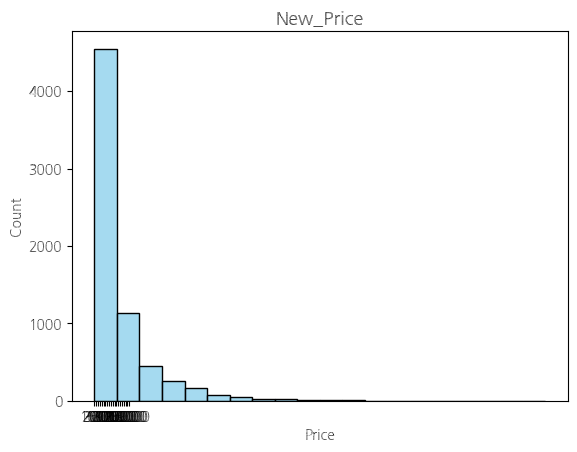

In [13]:
sns.histplot(data=data, x='Price', bins=20,  color="skyblue")
plt.title('New_Price', fontsize=13)
plt.xticks(np.arange(0, 20000, 1000))
plt.show()

In [28]:
y_log_transformed = np.log1p(data['Price'].to_numpy().reshape(-1, 1))

scaler = StandardScaler()
y_normalized = scaler.fit_transform(y_log_transformed)
y_normalized

array([[-1.79939941],
       [ 1.10620803],
       [ 1.28516084],
       ...,
       [ 1.15309119],
       [ 1.52069391],
       [ 1.52413486]])

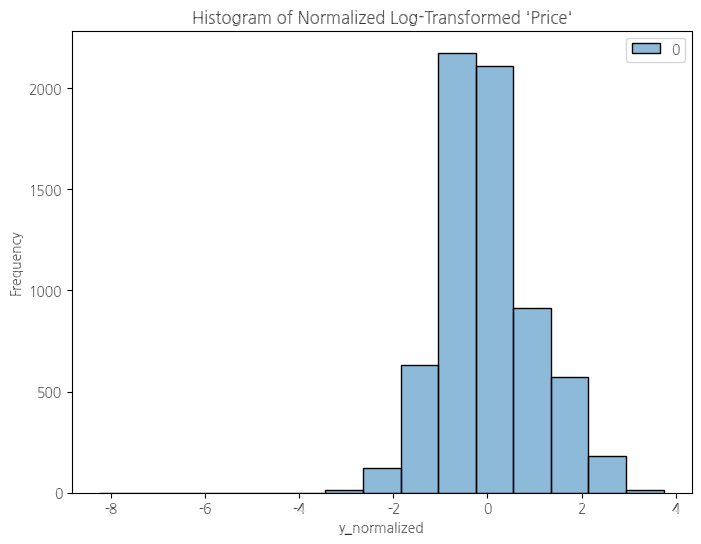

In [34]:
plt.figure(figsize=(8, 6))
sns.histplot(y_normalized, bins=15, color="skyblue")
plt.title("Histogram of Normalized Log-Transformed 'Price'")
plt.xlabel("y_normalized")
plt.ylabel("Frequency")
plt.show()